In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

%matplotlib inline   
import matplotlib.pyplot as plt


In [2]:
housing_train = pd.read_csv("/Users/harini-mac/Desktop/Northwestern University/MSDS-422/Week2/Assignment2/house-prices-advanced-regression-techniques/train.csv")
housing_test = pd.read_csv("/Users/harini-mac/Desktop/Northwestern University/MSDS-422/Week2/Assignment2/house-prices-advanced-regression-techniques/test.csv")

In [3]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
housing_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [6]:
housing_train.shape

(1460, 81)

In [7]:
housing_test.shape

(1459, 80)

In [8]:
housing_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
# Drop the Id field
housing_train = housing_train.drop(['Id'], axis=1)

In [10]:
housing_train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [11]:
housing_train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [12]:
#Remove records with MSZoning values other than Residential homes - RH, RL, RP, and RM 
housing_train = housing_train[(housing_train['MSZoning'] == 'RH') | (housing_train['MSZoning'] == 'RL') | (housing_train['MSZoning'] == 'RP') | (housing_train['MSZoning'] == 'RM')]
#Remove records where SaleCondtion is not 'Normal'
housing_train = housing_train[(housing_train['SaleCondition'] == 'Normal') ]
housing_train.shape

(1155, 80)

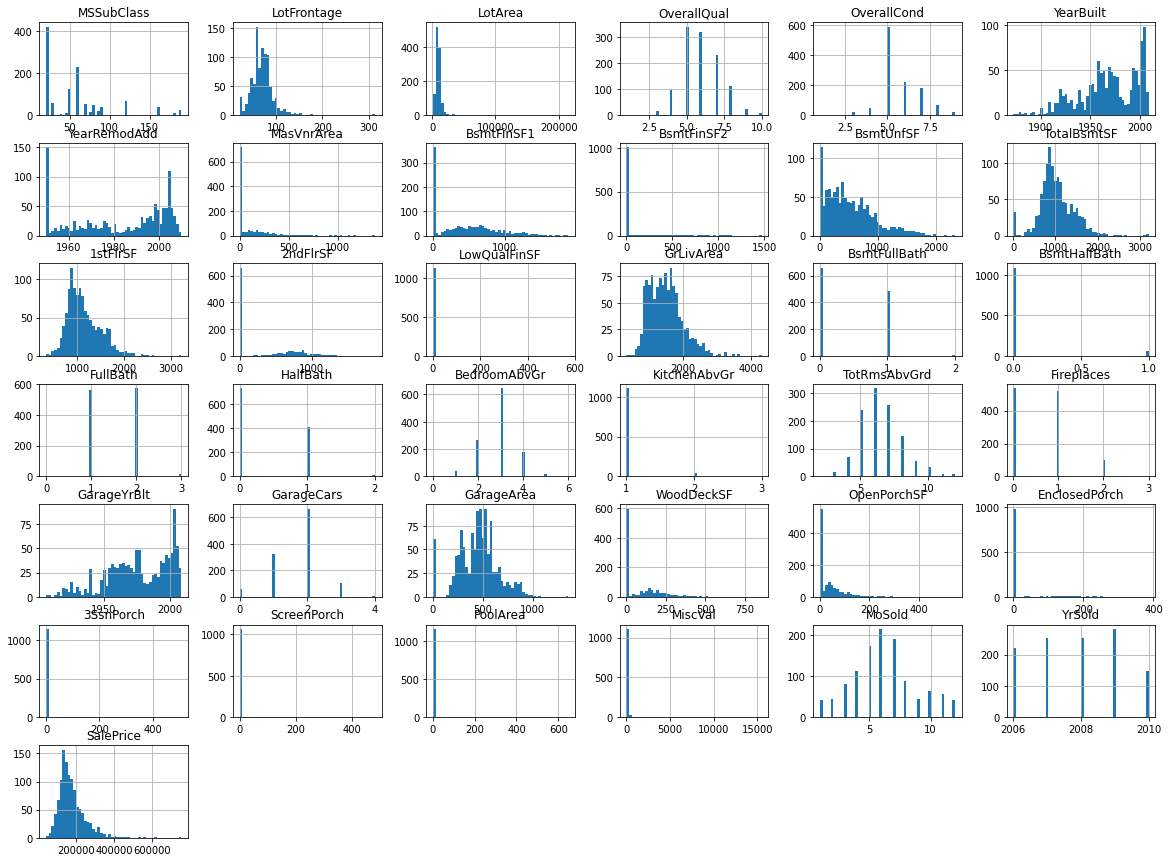

In [13]:
# Graph the histograms 
housing_train.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

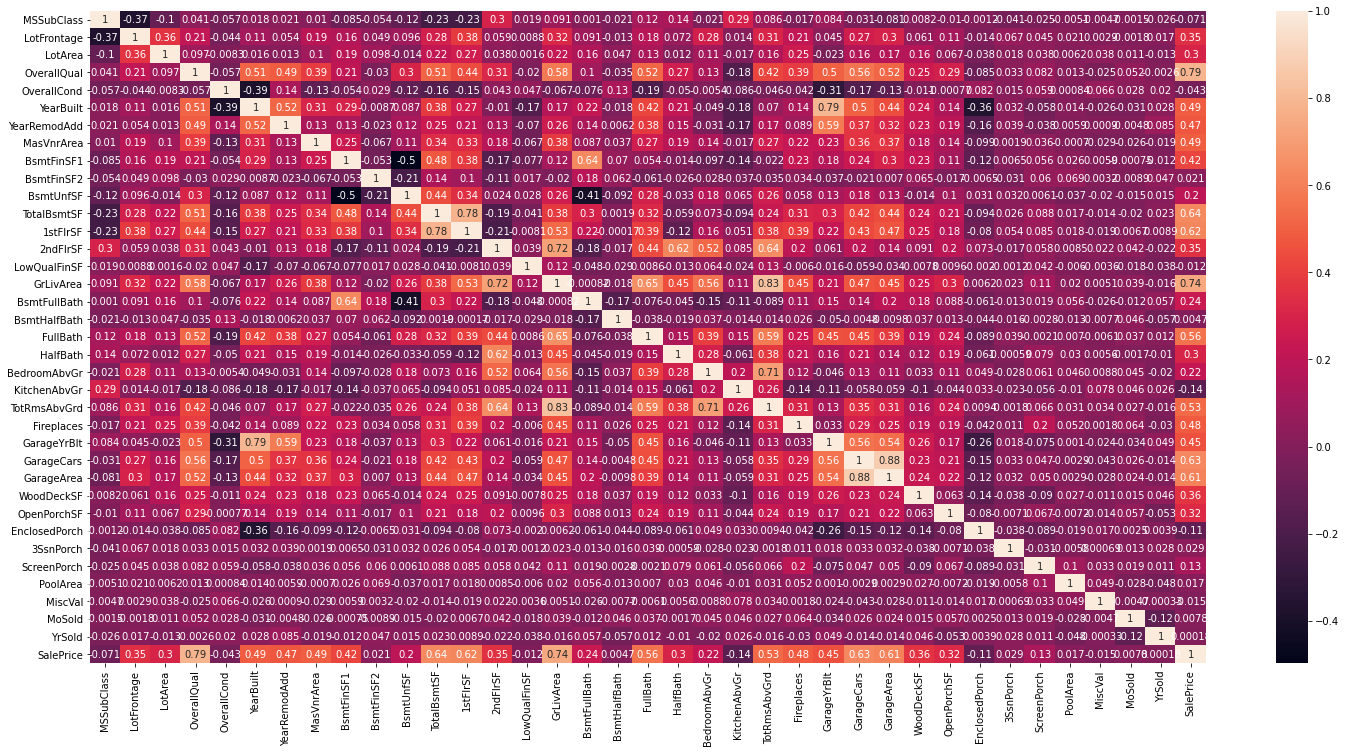

In [14]:
# Create the correlation matrix
plt.figure(figsize=(25,12))
sns.heatmap(housing_train.corr(),annot=True, )

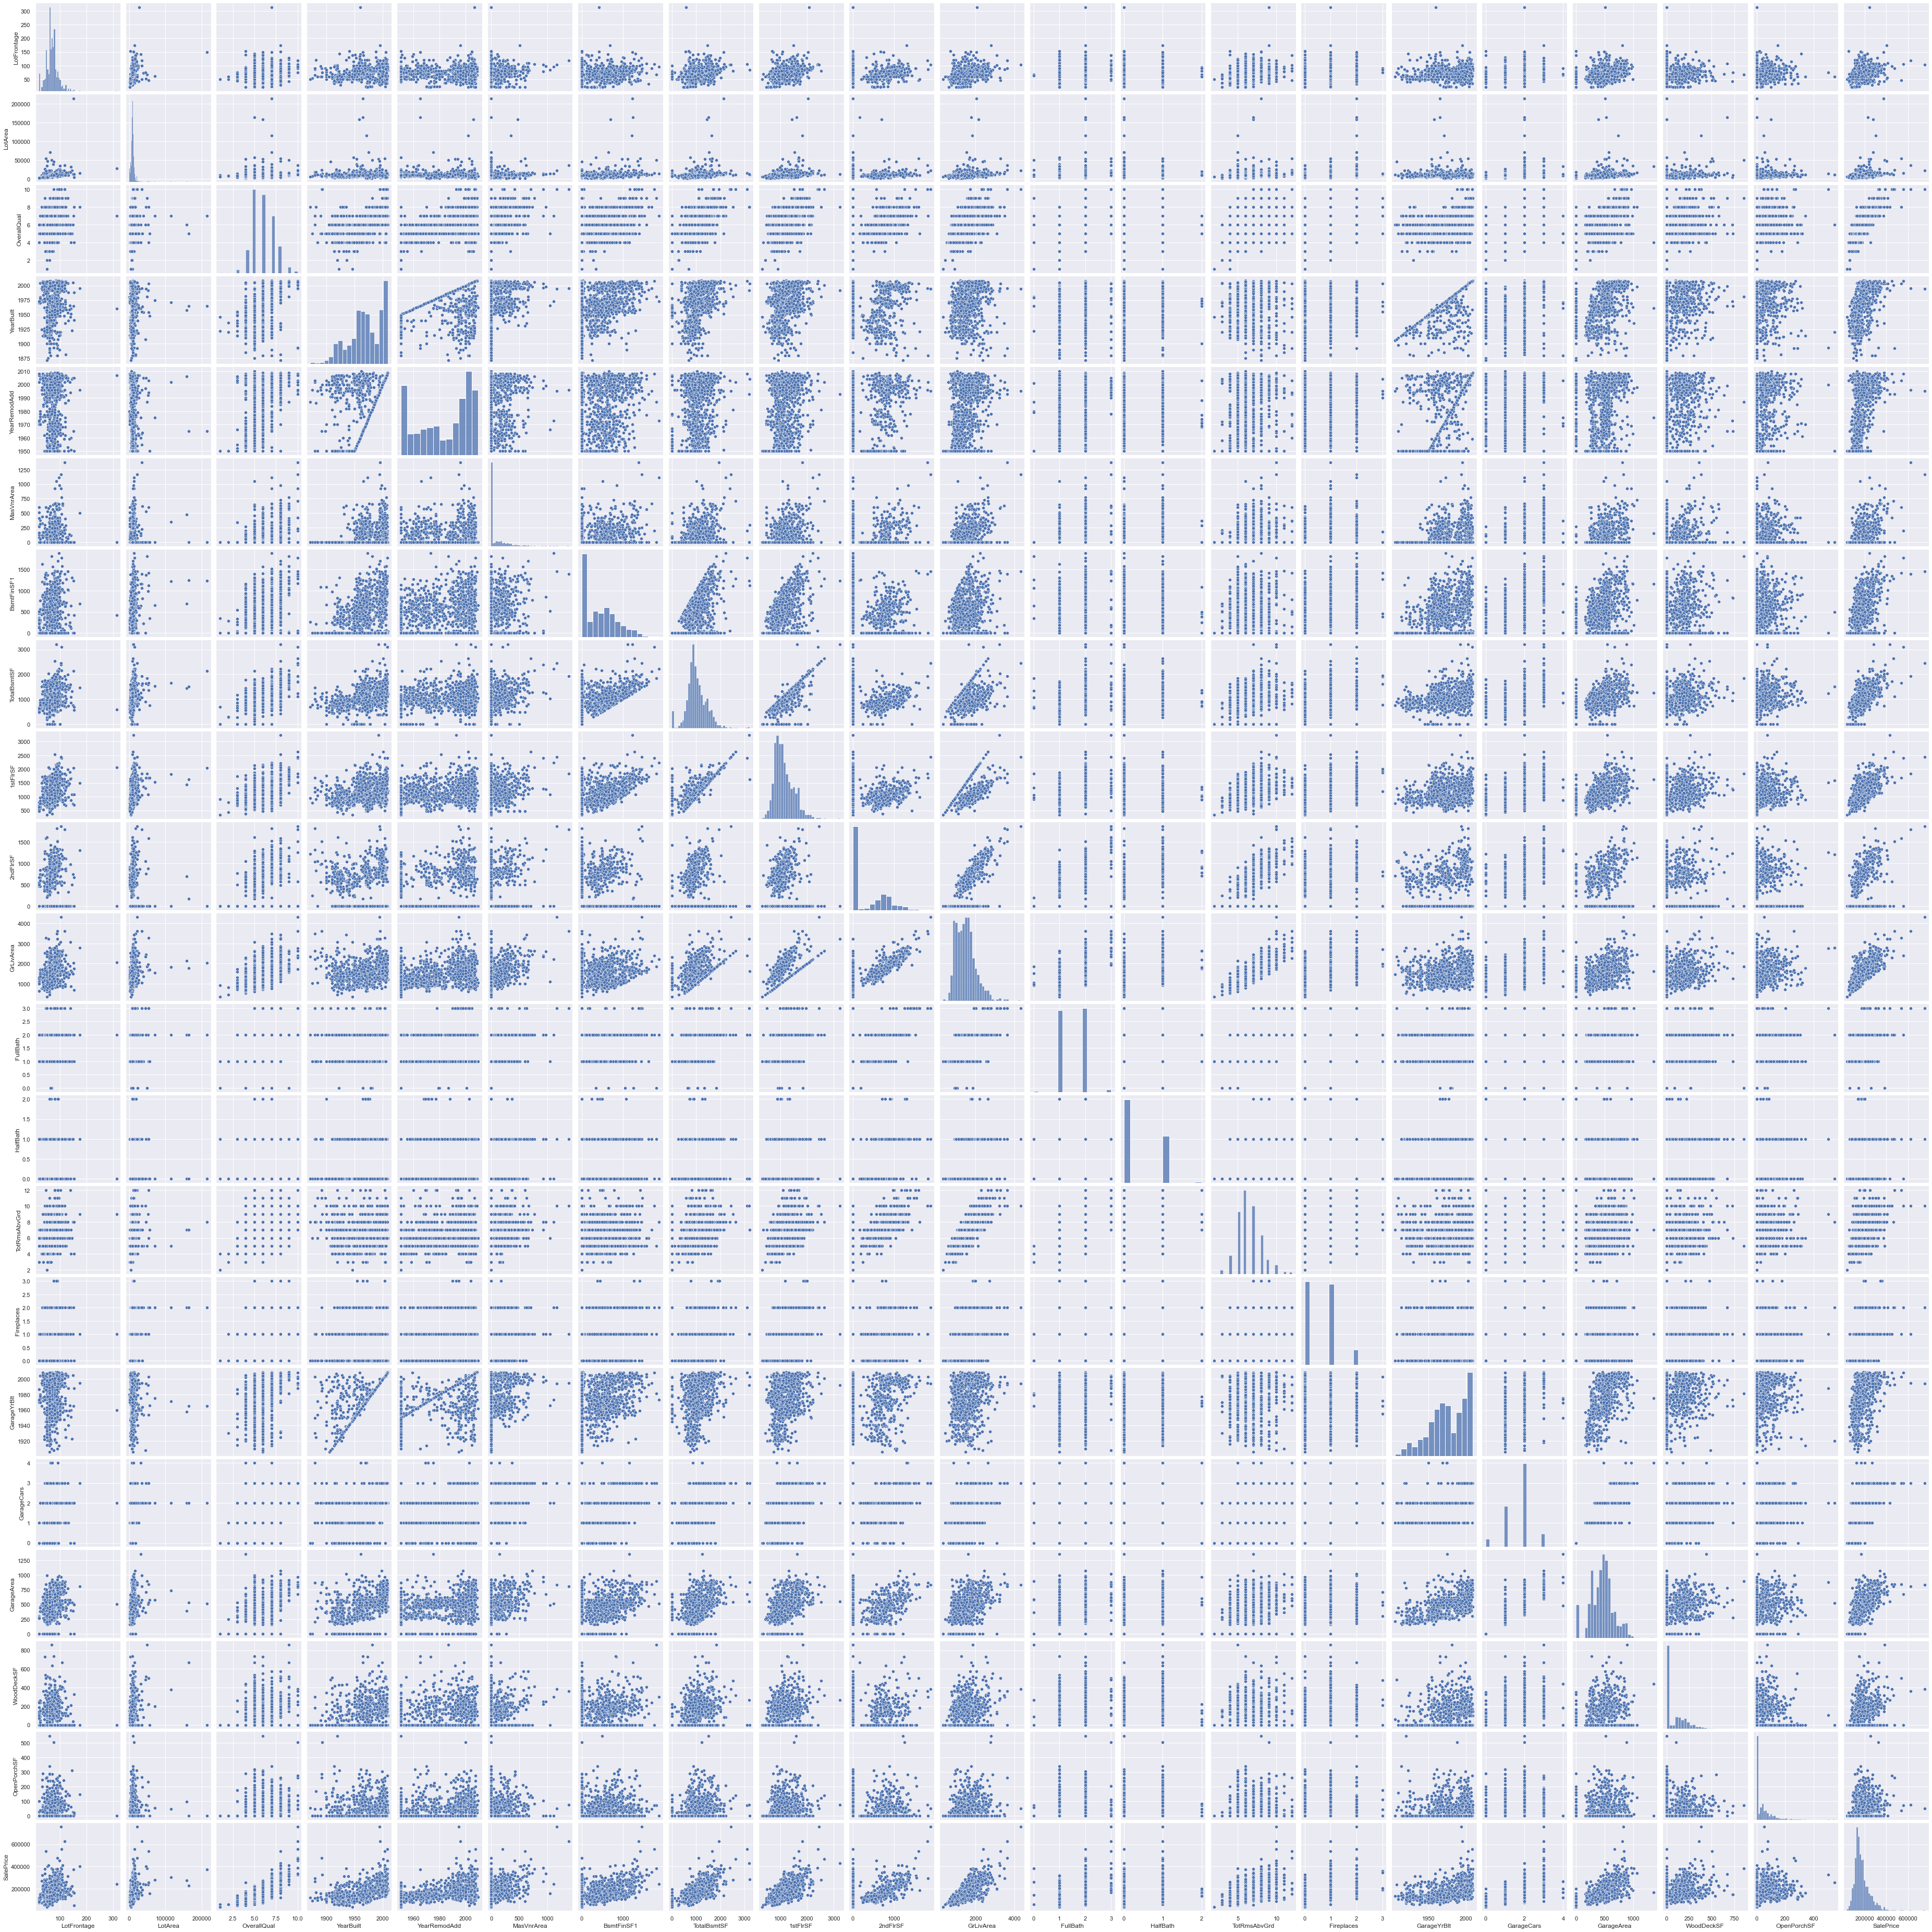

In [15]:
# These are attributes that have moderate to strong correlation with SalePrice
sns.set()
cols = ["LotFrontage","LotArea","OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","HalfBath","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","SalePrice"]

# Create pairplots for columns of interest
sns.pairplot(housing_train[cols], height = 2.5)
plt.show();

Text(0.5, 1.0, 'SalePrice')

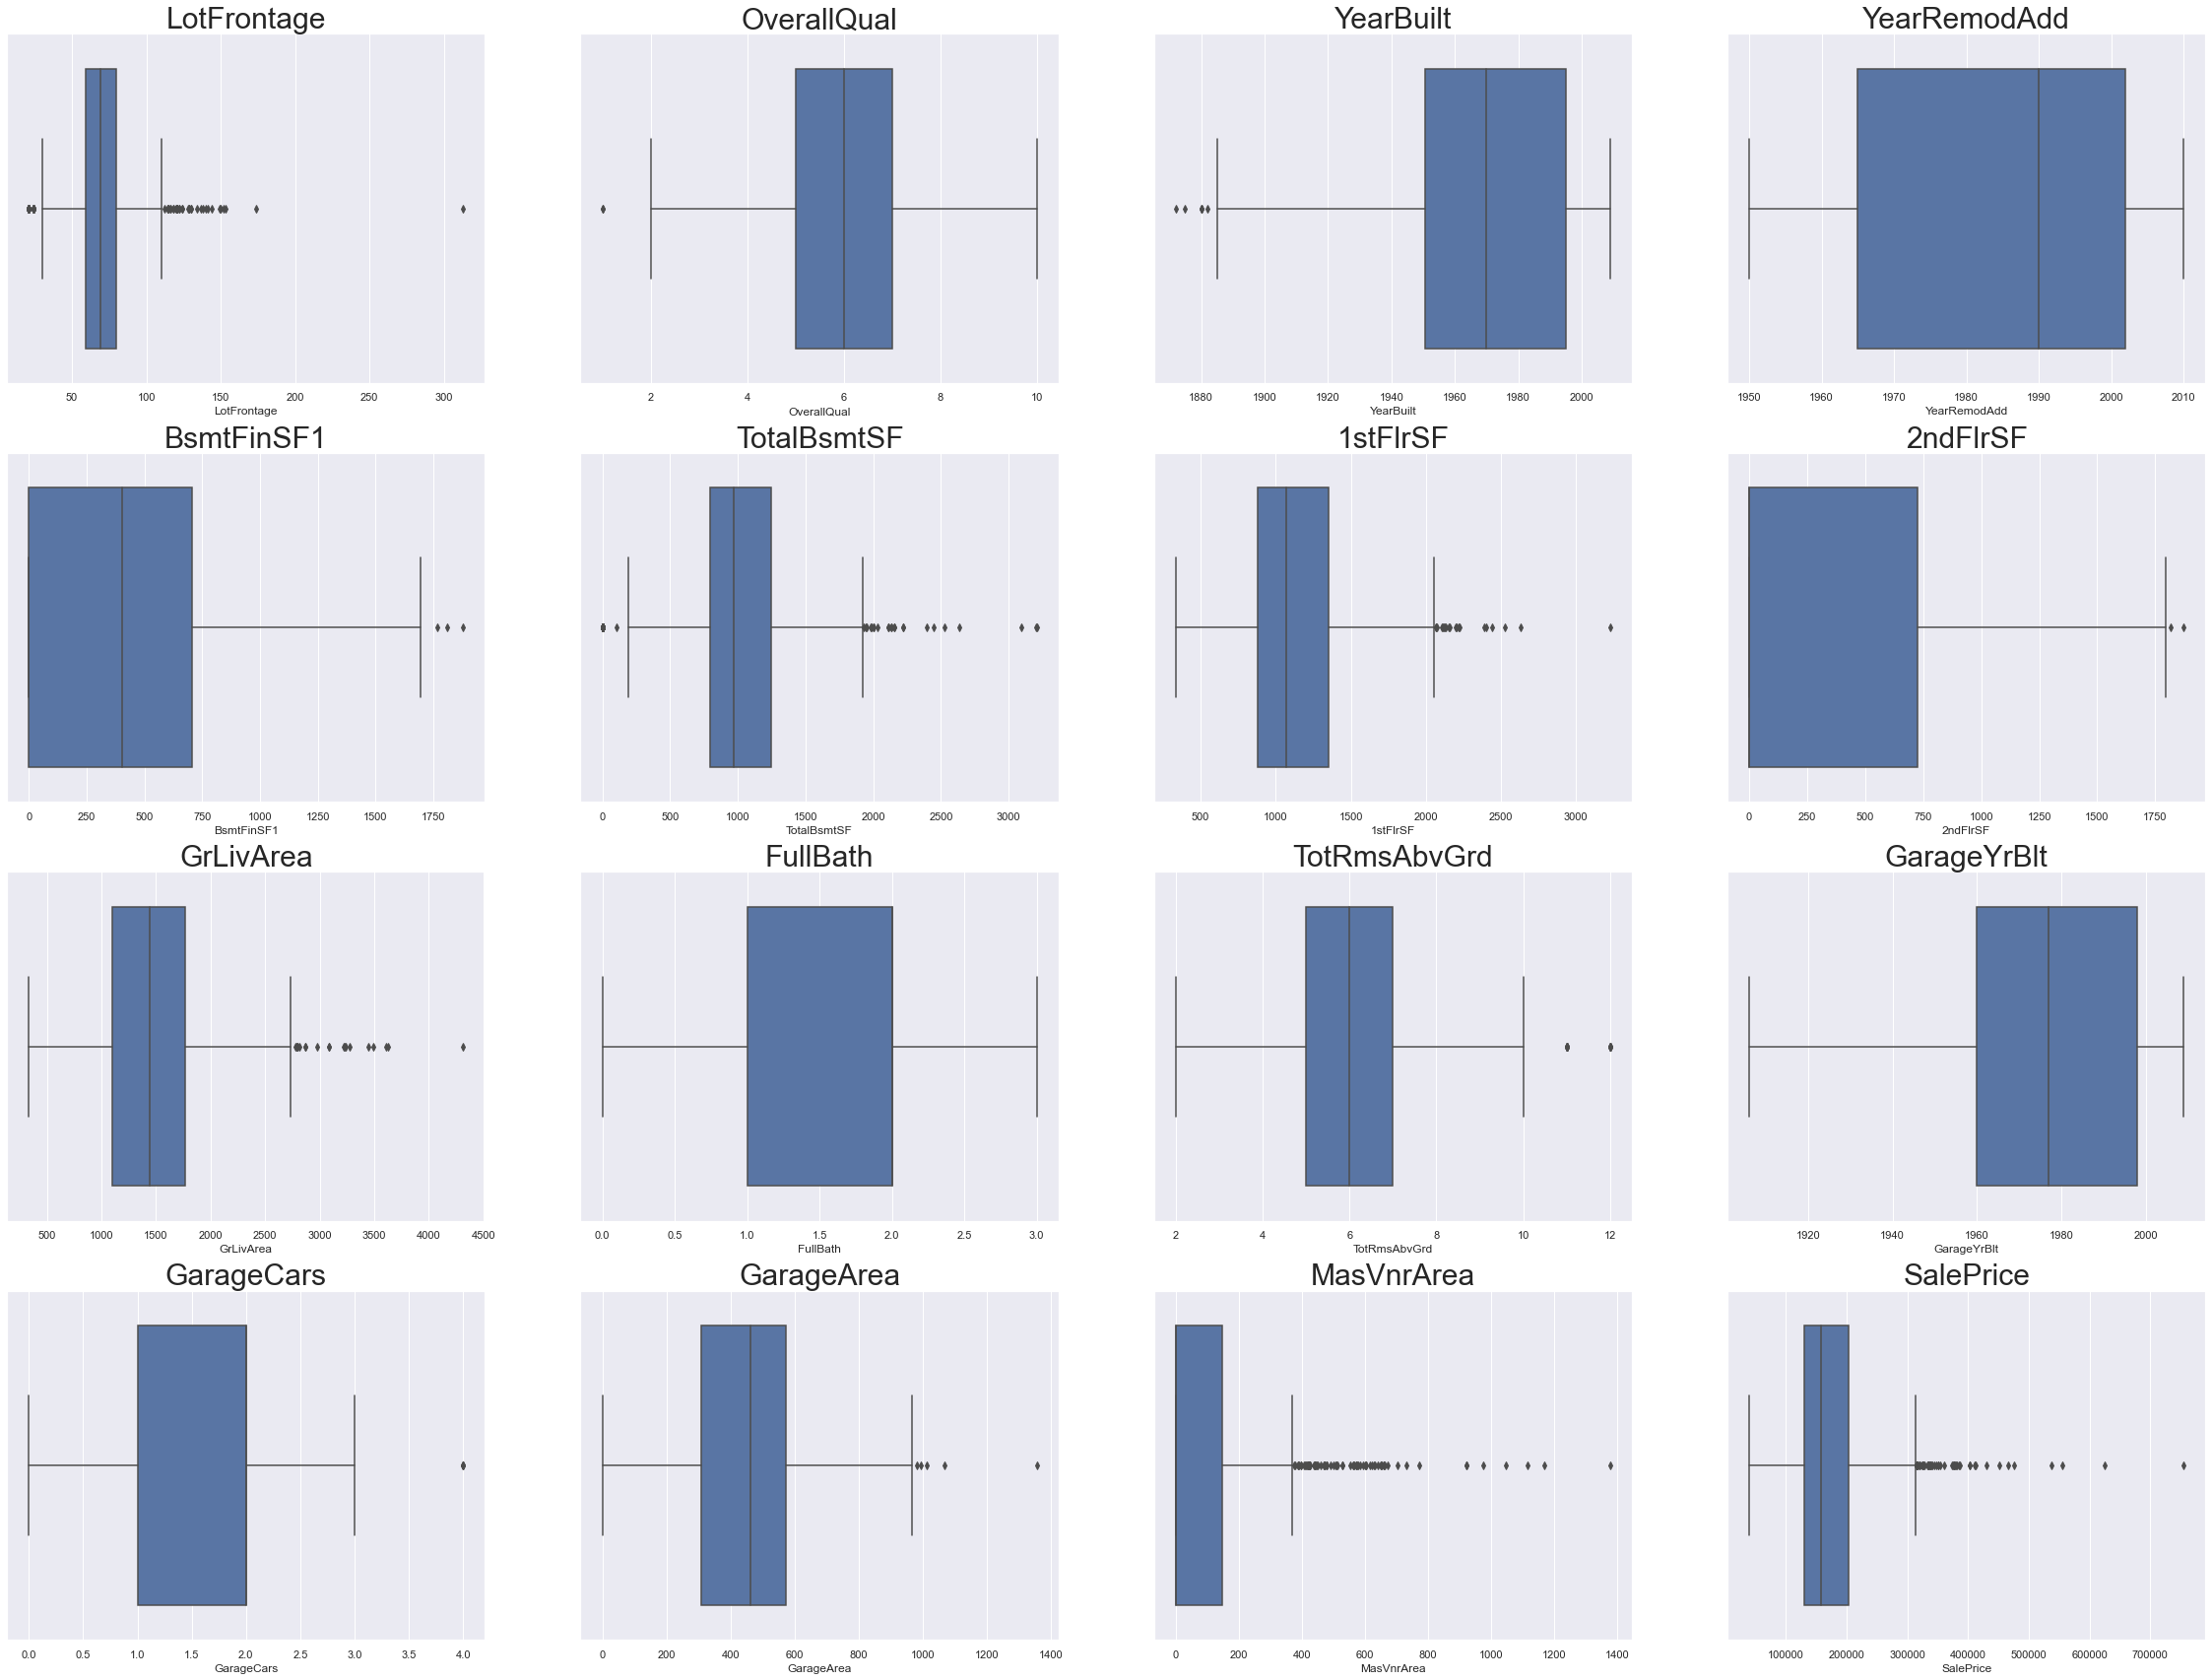

In [16]:
fig, axs = plt.subplots(4,4, figsize=(40, 30))

sns.boxplot(x=housing_train["LotFrontage"], ax=axs[0,0])
axs[0, 0].set_title('LotFrontage',fontsize=30)

sns.boxplot(x=housing_train["OverallQual"], ax=axs[0,1])
axs[0, 1].set_title('OverallQual',fontsize=30)

sns.boxplot(x=housing_train["YearBuilt"], ax=axs[0, 2])
axs[0, 2].set_title('YearBuilt',fontsize=30)

sns.boxplot(x=housing_train["YearRemodAdd"], ax=axs[0, 3])
axs[0, 3].set_title('YearRemodAdd',fontsize=30)

sns.boxplot(x=housing_train["BsmtFinSF1"], ax=axs[1,0])
axs[1, 0].set_title('BsmtFinSF1',fontsize=30)

sns.boxplot(x=housing_train["TotalBsmtSF"],ax=axs[1, 1])
axs[1, 1].set_title('TotalBsmtSF',fontsize=30)

sns.boxplot(x=housing_train["1stFlrSF"],ax=axs[1, 2])
axs[1, 2].set_title('1stFlrSF',fontsize=30)

sns.boxplot(x=housing_train["2ndFlrSF"],ax=axs[1, 3])
axs[1, 3].set_title('2ndFlrSF',fontsize=30)

sns.boxplot(x=housing_train["GrLivArea"],ax=axs[2, 0])
axs[2, 0].set_title('GrLivArea',fontsize=30)

sns.boxplot(x=housing_train["FullBath"],ax=axs[2, 1])
axs[2, 1].set_title('FullBath',fontsize=30)

sns.boxplot(x=housing_train["TotRmsAbvGrd"],ax=axs[2, 2])
axs[2, 2].set_title('TotRmsAbvGrd',fontsize=30)

sns.boxplot(x=housing_train["GarageYrBlt"],ax=axs[2, 3])
axs[2, 3].set_title('GarageYrBlt',fontsize=30)

sns.boxplot(x=housing_train["GarageCars"],ax=axs[3, 0])
axs[3, 0].set_title('GarageCars',fontsize=30)

sns.boxplot(x=housing_train["GarageArea"],ax=axs[3, 1])
axs[3, 1].set_title('GarageArea',fontsize=30)

sns.boxplot(x=housing_train["MasVnrArea"],ax=axs[3, 2])
axs[3, 2].set_title('MasVnrArea',fontsize=30)
    
sns.boxplot(x=housing_train["SalePrice"],ax=axs[3, 3])
axs[3, 3].set_title('SalePrice',fontsize=30)


Text(0.5, 1.0, 'SalePrice')

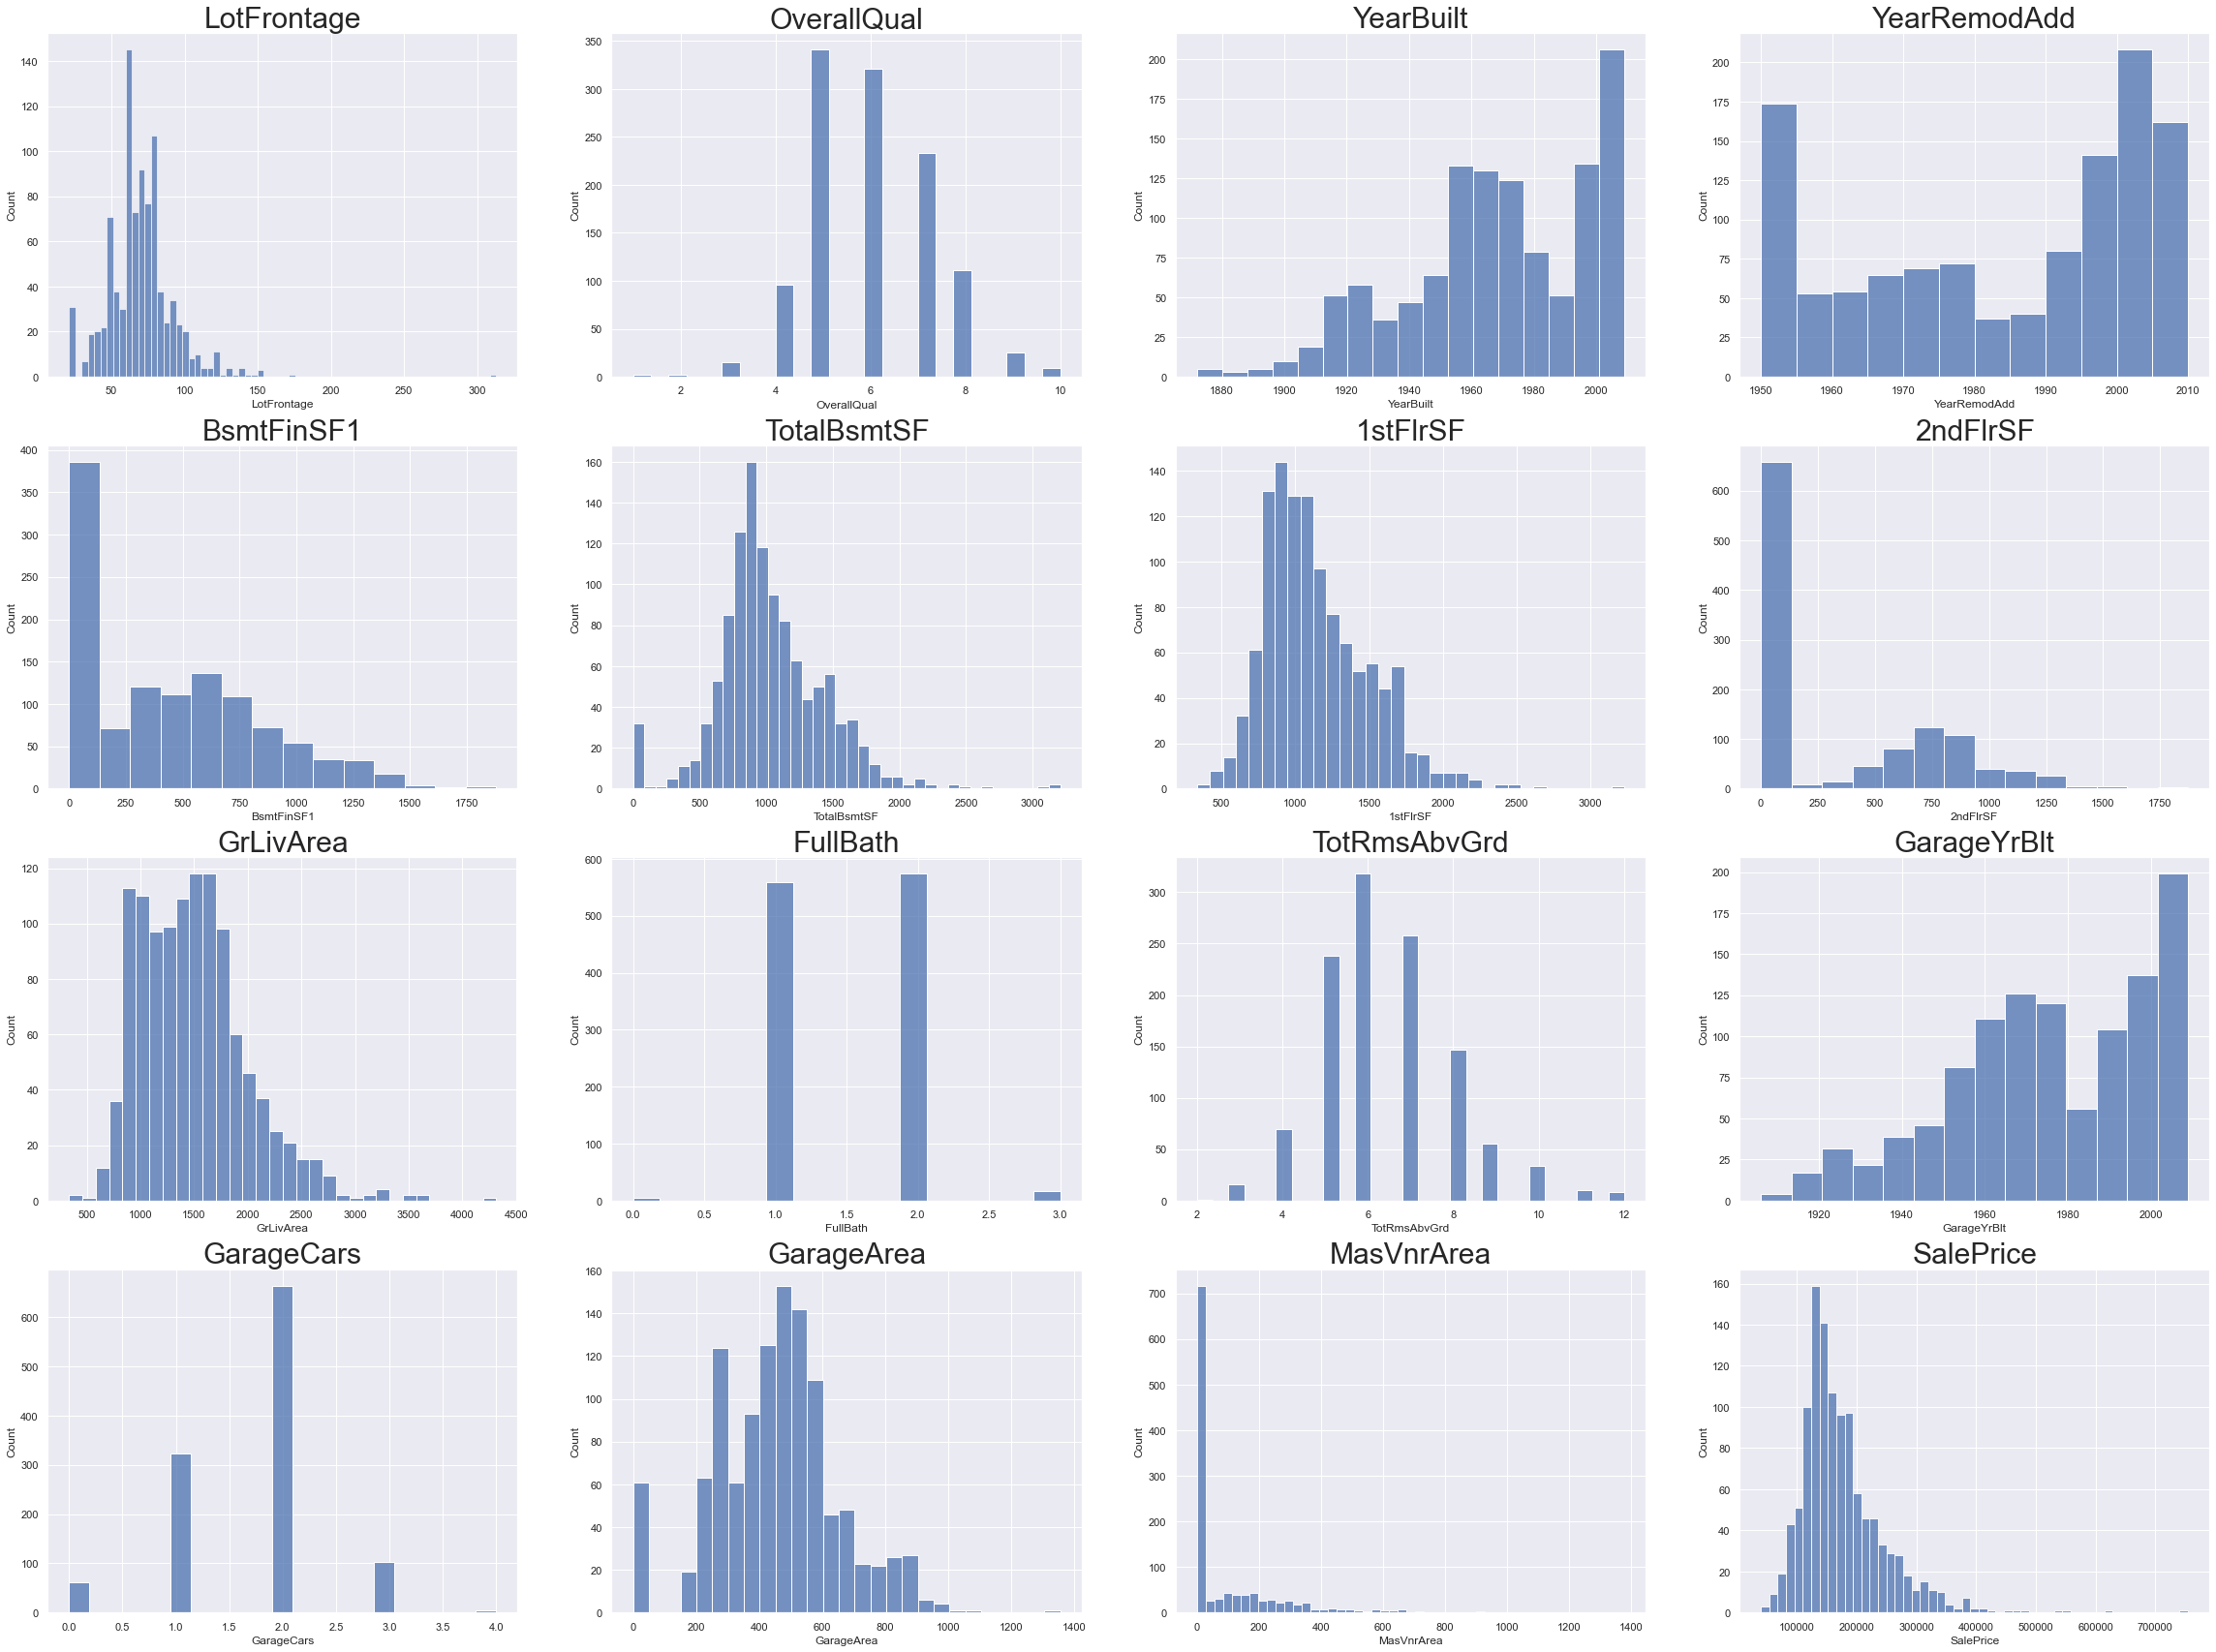

In [17]:
fig, axs = plt.subplots(4,4, figsize=(40, 30))

sns.histplot(x=housing_train["LotFrontage"], ax=axs[0,0])
axs[0, 0].set_title('LotFrontage',fontsize=30)

sns.histplot(x=housing_train["OverallQual"], ax=axs[0,1])
axs[0, 1].set_title('OverallQual',fontsize=30)

sns.histplot(x=housing_train["YearBuilt"], ax=axs[0, 2])
axs[0, 2].set_title('YearBuilt',fontsize=30)

sns.histplot(x=housing_train["YearRemodAdd"], ax=axs[0, 3])
axs[0, 3].set_title('YearRemodAdd',fontsize=30)

sns.histplot(x=housing_train["BsmtFinSF1"], ax=axs[1,0])
axs[1, 0].set_title('BsmtFinSF1',fontsize=30)

sns.histplot(x=housing_train["TotalBsmtSF"],ax=axs[1, 1])
axs[1, 1].set_title('TotalBsmtSF',fontsize=30)

sns.histplot(x=housing_train["1stFlrSF"],ax=axs[1, 2])
axs[1, 2].set_title('1stFlrSF',fontsize=30)

sns.histplot(x=housing_train["2ndFlrSF"],ax=axs[1, 3])
axs[1, 3].set_title('2ndFlrSF',fontsize=30)

sns.histplot(x=housing_train["GrLivArea"],ax=axs[2, 0])
axs[2, 0].set_title('GrLivArea',fontsize=30)

sns.histplot(x=housing_train["FullBath"],ax=axs[2, 1])
axs[2, 1].set_title('FullBath',fontsize=30)

sns.histplot(x=housing_train["TotRmsAbvGrd"],ax=axs[2, 2])
axs[2, 2].set_title('TotRmsAbvGrd',fontsize=30)

sns.histplot(x=housing_train["GarageYrBlt"],ax=axs[2, 3])
axs[2, 3].set_title('GarageYrBlt',fontsize=30)

sns.histplot(x=housing_train["GarageCars"],ax=axs[3, 0])
axs[3, 0].set_title('GarageCars',fontsize=30)

sns.histplot(x=housing_train["GarageArea"],ax=axs[3, 1])
axs[3, 1].set_title('GarageArea',fontsize=30)

sns.histplot(x=housing_train["MasVnrArea"],ax=axs[3, 2])
axs[3, 2].set_title('MasVnrArea',fontsize=30)
    
sns.histplot(x=housing_train["SalePrice"],ax=axs[3, 3])
axs[3, 3].set_title('SalePrice',fontsize=30)



In [18]:
#attributes = ["LotFrontage","OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageYrBlt","GarageCars","GarageArea","SalePrice"]

attributes = ["LotFrontage","OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","TotRmsAbvGrd","GarageYrBlt","GarageArea","SalePrice"]

data_cln=housing_train[attributes].dropna()

#data_cln=housing_train[(housing_train['LotFrontage'] < 200)& (housing_train['BsmtFinSF1'] < 2000) & (housing_train['TotalBsmtSF'] < 2500) &
#                       (housing_train['1stFlrSF'] < 2500) & (housing_train['2ndFlrSF'] < 1750) & (housing_train['GrLivArea'] < 3500) & 
#                       (housing_train['GarageArea'] < 1000) & (housing_train['MasVnrArea'] < 500)]

data_cln = data_cln[(data_cln['GrLivArea'] > 500) & data_cln['GrLivArea'] < 3500]
data_cln = data_cln[(data_cln['YearBuilt'] > 1920)]
data_cln = data_cln[(data_cln['TotRmsAbvGrd'] <= 10)]
data_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   786 non-null    float64
 1   OverallQual   786 non-null    int64  
 2   YearBuilt     786 non-null    int64  
 3   YearRemodAdd  786 non-null    int64  
 4   MasVnrArea    786 non-null    float64
 5   BsmtFinSF1    786 non-null    int64  
 6   TotalBsmtSF   786 non-null    int64  
 7   1stFlrSF      786 non-null    int64  
 8   2ndFlrSF      786 non-null    int64  
 9   GrLivArea     786 non-null    int64  
 10  TotRmsAbvGrd  786 non-null    int64  
 11  GarageYrBlt   786 non-null    float64
 12  GarageArea    786 non-null    int64  
 13  SalePrice     786 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 92.1 KB


In [19]:
# skewness of the cleaned data
data_cln.skew(axis=0)

LotFrontage     1.836836
OverallQual     0.401093
YearBuilt      -0.285189
YearRemodAdd   -0.472709
MasVnrArea      2.607091
BsmtFinSF1      0.613852
TotalBsmtSF     0.564477
1stFlrSF        0.828423
2ndFlrSF        0.903124
GrLivArea       0.925946
TotRmsAbvGrd    0.422322
GarageYrBlt    -0.446270
GarageArea      0.484619
SalePrice       2.018109
dtype: float64

In [20]:
# Kurtosis of the cleaned data
data_cln.kurtosis(axis=0)

LotFrontage     15.570563
OverallQual     -0.122669
YearBuilt       -1.020051
YearRemodAdd    -1.309294
MasVnrArea       9.510295
BsmtFinSF1      -0.291638
TotalBsmtSF      2.289651
1stFlrSF         0.565800
2ndFlrSF        -0.447347
GrLivArea        2.171178
TotRmsAbvGrd     0.054610
GarageYrBlt     -0.785693
GarageArea      -0.109859
SalePrice        8.423343
dtype: float64

In [21]:
# Apply scaling to the data
df = data_cln[attributes].reset_index()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df=scaled_features_df.drop(['index'],axis=1)
scaled_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   786 non-null    float64
 1   OverallQual   786 non-null    float64
 2   YearBuilt     786 non-null    float64
 3   YearRemodAdd  786 non-null    float64
 4   MasVnrArea    786 non-null    float64
 5   BsmtFinSF1    786 non-null    float64
 6   TotalBsmtSF   786 non-null    float64
 7   1stFlrSF      786 non-null    float64
 8   2ndFlrSF      786 non-null    float64
 9   GrLivArea     786 non-null    float64
 10  TotRmsAbvGrd  786 non-null    float64
 11  GarageYrBlt   786 non-null    float64
 12  GarageArea    786 non-null    float64
 13  SalePrice     786 non-null    float64
dtypes: float64(14)
memory usage: 86.1 KB


In [22]:
scaled_features_df.skew(axis=0)

LotFrontage     1.836836
OverallQual     0.401093
YearBuilt      -0.285189
YearRemodAdd   -0.472709
MasVnrArea      2.607091
BsmtFinSF1      0.613852
TotalBsmtSF     0.564477
1stFlrSF        0.828423
2ndFlrSF        0.903124
GrLivArea       0.925946
TotRmsAbvGrd    0.422322
GarageYrBlt    -0.446270
GarageArea      0.484619
SalePrice       2.018109
dtype: float64

In [23]:
scaled_features_df.kurtosis(axis=0)

LotFrontage     15.570563
OverallQual     -0.122669
YearBuilt       -1.020051
YearRemodAdd    -1.309294
MasVnrArea       9.510295
BsmtFinSF1      -0.291638
TotalBsmtSF      2.289651
1stFlrSF         0.565800
2ndFlrSF        -0.447347
GrLivArea        2.171178
TotRmsAbvGrd     0.054610
GarageYrBlt     -0.785693
GarageArea      -0.109859
SalePrice        8.423343
dtype: float64

In [24]:
# Variables of interest
#explainVar = ["LotFrontage","OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageYrBlt","GarageCars","GarageArea"]
explainVar = ["LotFrontage","OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","TotRmsAbvGrd","GarageYrBlt","GarageArea"]
responseVar = ["SalePrice"]

X = scaled_features_df[explainVar]
y = scaled_features_df[responseVar]

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.03)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(550, 13) (550, 1)
(24, 13) (24, 1)


In [25]:
# obtain the skewness of the variables
X.skew(axis = 0, skipna = True) 

LotFrontage     1.836836
OverallQual     0.401093
YearBuilt      -0.285189
YearRemodAdd   -0.472709
MasVnrArea      2.607091
BsmtFinSF1      0.613852
TotalBsmtSF     0.564477
1stFlrSF        0.828423
2ndFlrSF        0.903124
GrLivArea       0.925946
TotRmsAbvGrd    0.422322
GarageYrBlt    -0.446270
GarageArea      0.484619
dtype: float64

In [26]:
# obtain the kurtosis of the variables
X.kurtosis(axis = 0, skipna = True) 

LotFrontage     15.570563
OverallQual     -0.122669
YearBuilt       -1.020051
YearRemodAdd    -1.309294
MasVnrArea       9.510295
BsmtFinSF1      -0.291638
TotalBsmtSF      2.289651
1stFlrSF         0.565800
2ndFlrSF        -0.447347
GrLivArea        2.171178
TotRmsAbvGrd     0.054610
GarageYrBlt     -0.785693
GarageArea      -0.109859
dtype: float64

In [27]:
#######################
#  Linear Regression  #
#######################

from sklearn.linear_model import LinearRegression

# Fit a single model 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('Linear Regression: ')
print('Intercept:', lin_reg.intercept_)
print('Coefficients: ',lin_reg.coef_)


Linear Regression: 
Intercept: [0.00135619]
Coefficients:  [[ 0.04576874  0.31713783 -0.03729166  0.1182623   0.05158641  0.18627262
   0.14971214  0.19910772  0.22641799  0.11459745 -0.02510484  0.04416762
   0.08158804]]


In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 286 to 312
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   550 non-null    float64
 1   OverallQual   550 non-null    float64
 2   YearBuilt     550 non-null    float64
 3   YearRemodAdd  550 non-null    float64
 4   MasVnrArea    550 non-null    float64
 5   BsmtFinSF1    550 non-null    float64
 6   TotalBsmtSF   550 non-null    float64
 7   1stFlrSF      550 non-null    float64
 8   2ndFlrSF      550 non-null    float64
 9   GrLivArea     550 non-null    float64
 10  TotRmsAbvGrd  550 non-null    float64
 11  GarageYrBlt   550 non-null    float64
 12  GarageArea    550 non-null    float64
dtypes: float64(13)
memory usage: 60.2 KB


In [29]:
print('coefficient of determination - Linear Regression Model (Train data):', lin_reg.score(X_train,y_train))
print('coefficient of determination - Linear Regression Model (Test data):', lin_reg.score(X_test,y_test))

coefficient of determination - Linear Regression Model (Train data): 0.8834922685948028
coefficient of determination - Linear Regression Model (Test data): 0.8895194061179467


In [30]:
y_pred_test = lin_reg.predict(X_test)

print ('Linear Regression Prediction Errors: ')

# R2 score
print("R2 score: %.2f", metrics.r2_score(y_test, y_pred_test))

# Mean Squared Error
print("mean_squared_error", metrics.mean_squared_error(y_test, y_pred_test))

# RMSE
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
# Mean Absolute Error
print("mean_absolute_error", metrics.mean_absolute_error(y_test, y_pred_test))

Linear Regression Prediction Errors: 
R2 score: %.2f 0.8895194061179467
mean_squared_error 0.1600939412434421
RMSE 0.4001174093231162
mean_absolute_error 0.2877463732736938


In [31]:
# using cross validation design
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

hyper_params = [{'n_features_to_select': list(range(1, 13))}]
rfe = RFE(lin_reg)  


model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.4s finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.014012      0.000456         0.002982        0.000424   
1        0.008239      0.000375         0.002140        0.000053   
2        0.007695      0.000104         0.002095        0.000011   
3        0.007255      0.000123         0.002098        0.000016   
4        0.006626      0.000099         0.002041        0.000029   
5        0.006251      0.000363         0.002157        0.000186   
6        0.005542      0.000054         0.002075        0.000063   
7        0.005014      0.000048         0.002011        0.000016   
8        0.004520      0.000007         0.002010        0.000015   
9        0.004054      0.000006         0.002038        0.000052   
10       0.003618      0.000022         0.002056        0.000070   
11       0.003139      0.000072         0.001958        0.000010   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   

    split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0            0.657305           0.679742           0.654283         0.663777   
1            0.742731           0.748252           0.705248         0.732077   
2            0.793872           0.788930           0.796828         0.793210   
3            0.833086           0.851820           0.829958         0.838288   
4            0.828948           0.856512           0.840106         0.841856   
5            0.838684           0.865996           0.852435         0.852372   
6            0.834323           0.865990           0.860395         0.853570   
7            0.848556           0.875215           0.860593         0.861454   
8            0.844139           0.874968           0.860872         0.859993   
9            0.850433           0.876525           0.861028         0.862662   
10           0.857525           0.875980           0.861049         0.864851   
11           0.857587           0.876055           0.861022         0.864888   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.011357               12            0.674001            0.662805   
1         0.019105               11            0.733453            0.728215   
2         0.003258               10            0.802322            0.804864   
3         0.009653                9            0.853914            0.844955   
4         0.011321                8            0.866904            0.860729   
5         0.011150                7            0.874127            0.867318   
6         0.013800                6            0.875308            0.867318   
7         0.010901                4            0.878577            0.877188   
8         0.012601                5            0.884408            0.880539   
9         0.010714                3            0.886166            0.881829   
10        0.008000                2            0.886890            0.882241   
11        0.008020                1            0.886891            0.882299   

    split2_train_score  mean_train_score  std_train_score  
0             0.681241          0.672683         0.007584  
1             0.754298          0.738655         0.011266  
2             0.802713          0.803300         0

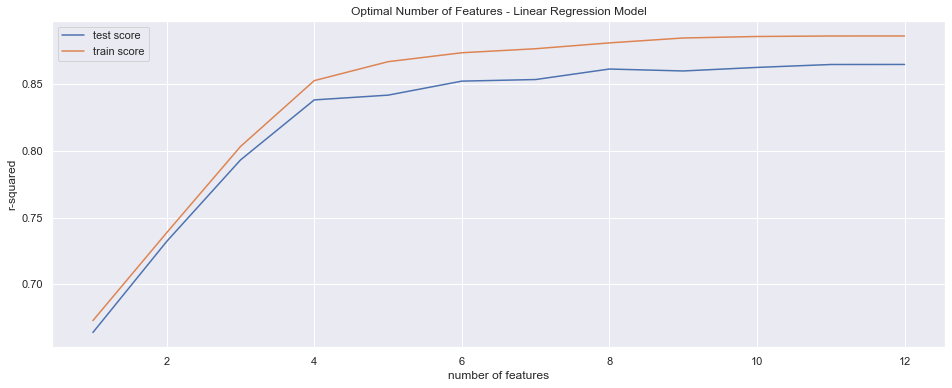

In [32]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features - Linear Regression Model")
plt.legend(['test score', 'train score'], loc='upper left')

In [33]:
# print the best estimator details
print("Optimal number of features : %d" % model_cv.best_estimator_.n_features_)
features=list(X.columns[model_cv.best_estimator_.support_])
print(features)
print('ranking of features:')
model_cv.best_estimator_.ranking_

Optimal number of features : 12
['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea']
ranking of features:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [34]:
print('RMSE values using best linear regression model (Response var: SalePrice): ')
#use the best model to compute RMSE using CV design
lin_reg = model_cv.best_estimator_ ## Best LR model

lin_reg_scores  = cross_val_score(lin_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
lin_rmse_scores

RMSE values using best linear regression model (Response var: SalePrice): 


array([0.37716051, 0.42210649, 0.3279636 ])

In [35]:
#house prices using housing_test data frame
test_df = housing_test[explainVar]

#scale the variables in the housing_test data set and remove NANs
scaler = StandardScaler()
scaled_test_features = scaler.fit_transform(test_df)
scaled_test_features_df = pd.DataFrame(scaled_test_features, index=test_df.index,columns=test_df.columns)
scaled_test_features_df=scaled_test_features_df.dropna()

In [36]:
#Predictions of the SalePrice (Standardized) using Linear Regression based on housing_test
#Note we do not have SalEPrice to compute accuracy
housing_test_pred = lin_reg.predict(scaled_test_features_df)
housing_test_pred

array([[-0.75392385],
       [-0.03447897],
       [ 0.04871594],
       ...,
       [-1.25027542],
       [ 0.20008158],
       [ 0.83520921]])

In [37]:
#######################
#  Ridge Regression   #
#######################

#Fit a single model 
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

print('Ridge Regression: ')
print('Intercept:', ridge_reg.intercept_)
print('Coefficients: ',ridge_reg.coef_)

Ridge Regression: 
Intercept: [0.00137688]
Coefficients:  [[ 0.04583404  0.31581738 -0.03415043  0.11851599  0.05177974  0.18609111
   0.14975339  0.1612831   0.18197113  0.16326576 -0.0242349   0.04175332
   0.08200502]]


In [38]:
print('coefficient of determination - Ridge Regression - Traindata:', ridge_reg.score(X_train,y_train))
print('coefficient of determination - Ridge Regression - Test data:', ridge_reg.score(X_test,y_test))

coefficient of determination - Ridge Regression - Traindata: 0.8834791540100462
coefficient of determination - Ridge Regression - Test data: 0.8895925163405579


In [39]:
y_pred_test = ridge_reg.predict(X_test)

print ('Ridge Regression Prediction Errors: ')
# R2 score
print("R2 score: %.2f", metrics.r2_score(y_test, y_pred_test))

# Mean Squared Error
print("mean_squared_error", metrics.mean_squared_error(y_test, y_pred_test))

# RMSE
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
# Mean Absolute Error
print("mean_absolute_error", metrics.mean_absolute_error(y_test, y_pred_test))

Ridge Regression Prediction Errors: 
R2 score: %.2f 0.8895925163405579
mean_squared_error 0.15998799952760093
RMSE 0.39998499912821844
mean_absolute_error 0.28725378332281454


In [40]:
# using cross validation design
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

hyper_params = [{'alpha': [0, 0.1, 0.5, 1,10,50,100,200, 230, 250,265, 270, 275, 290, 300, 500]}]
model = Ridge() 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.003271      0.000252         0.002115        0.000034           0   
1        0.002673      0.000330         0.002062        0.000087         0.1   
2        0.002716      0.000385         0.001962        0.000027         0.5   
3        0.002672      0.000313         0.002036        0.000139           1   
4        0.002398      0.000021         0.001945        0.000058          10   
5        0.002400      0.000039         0.001933        0.000064          50   
6        0.002758      0.000251         0.001936        0.000006         100   
7        0.002480      0.000036         0.001947        0.000036         200   
8        0.002987      0.000430         0.002100        0.000164         230   
9        0.005378      0.000497         0.004529        0.000517         250   
10       0.003490      0.000151         0.002721        0.000035         265   
11       0.003642      0.000115         0.002646        0.000058         270   
12       0.002866      0.000360         0.002175        0.000250         275   
13       0.002637      0.000072         0.002230        0.000163         290   
14       0.002702      0.000067         0.002185        0.000123         300   
15       0.002998      0.000416         0.002260        0.000273         500   

            params  split0_test_score  split1_test_score  split2_test_score  \
0     {'alpha': 0}           0.858015           0.876436           0.861007   
1   {'alpha': 0.1}           0.858146           0.876417           0.861106   
2   {'alpha': 0.5}           0.858547           0.876349           0.861124   
3     {'alpha': 1}           0.858911           0.876270           0.861176   
4    {'alpha': 10}           0.862125           0.874888           0.861996   
5    {'alpha': 50}           0.866659           0.867435           0.862008   
6   {'alpha': 100}           0.866756           0.857428           0.858284   
7   {'alpha': 200}           0.861506           0.837592           0.847046   
8   {'alpha': 230}           0.859215           0.831738           0.843277   
9   {'alpha': 250}           0.857561           0.827859           0.840707   
10  {'alpha': 265}           0.856263           0.824960           0.838755   
11  {'alpha': 270}           0.855819           0.823996           0.838100   
12  {'alpha': 275}           0.855371           0.823034           0.837442   
13  {'alpha': 290}           0.853997           0.820151           0.835459   
14  {'alpha': 300}           0.853057           0.818235           0.834128   
15  {'alpha': 500}           0.831353           0.780738           0.806469   

    mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0          0.865153        0.008072                6            0.886914   
1          0.865223        0.008007                5            0.886912   
2          0.865340        0.007855                4            0.886888   
3          0.865453        0.007705                2            0.886853   
4          0.866336        0.006047                1            0.886420   
5          0.865367        0.002397                3            0.882912   
6          0.860823        0.004210                7            0.876974   
7          0.848715        0.009834                8            0.863623   
8          0.844743        0.011265                9            0.859455   
9          0.842042        0.012163               10            0.856650   
10         0.839993        0.012809               11            0.854534   
11         0.839305        0.013020               12            0.853827   
12         0.838616        0.013228               13            0.853118   
13         0.836536        0.013838               14            0.850987   
14         0.835140        0.014234               15            0.849562   
15         0.806187        0.020664               16            0.820491   

    sp

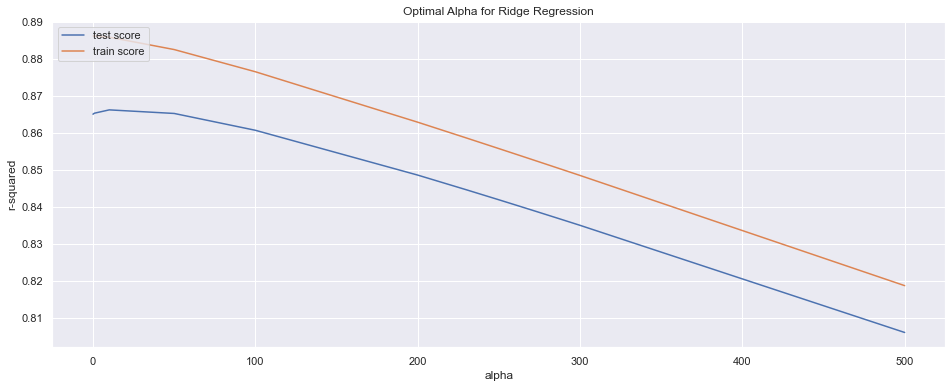

In [41]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('r-squared')
plt.title("Optimal Alpha for Ridge Regression")
plt.legend(['test score', 'train score'], loc='upper left')

In [42]:
model_cv.best_estimator_

Ridge(alpha=10)

In [43]:
ridge_reg.coef_

array([[ 0.04583404,  0.31581738, -0.03415043,  0.11851599,  0.05177974,
         0.18609111,  0.14975339,  0.1612831 ,  0.18197113,  0.16326576,
        -0.0242349 ,  0.04175332,  0.08200502]])

In [44]:
#Fit a single model 
print('RMSE values using best ridge regression model: ')
#use the best model to compute RMSE using CV design
ridge_reg = model_cv.best_estimator_ ## Best Ridge model 


ridge_reg_scores  = cross_val_score(ridge_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
ridge_rmse_scores = np.sqrt(-ridge_reg_scores)
ridge_rmse_scores



RMSE values using best ridge regression model: 


array([0.37343415, 0.41697588, 0.32620369])

In [45]:
ridge_reg.intercept_

array([0.00146558])

In [46]:
ridge_reg.coef_

array([[ 0.04516643,  0.30755075, -0.02240724,  0.11843797,  0.05315236,
         0.18359797,  0.15031164,  0.12675842,  0.14023498,  0.20127797,
        -0.01584905,  0.03418653,  0.08372757]])

In [47]:
#Predictions of the SalePrice (Standardized) using Ridge Regression based on housing_test
#Note we do not have SalEPrice to compute accuracy
housing_test_pred = ridge_reg.predict(scaled_test_features_df)
housing_test_pred

array([[-0.74433313],
       [-0.03340543],
       [ 0.05868877],
       ...,
       [-1.25325912],
       [ 0.19401039],
       [ 0.81005585]])

In [48]:
#######################
#  Lasso Regression   #
#######################
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

print('Lasso Regression: ')
print('Intercept:', lasso_reg.intercept_)
print('Coefficients: ',lasso_reg.coef_)

Lasso Regression: 
Intercept: [0.00196887]
Coefficients:  [0.         0.33165506 0.         0.04696868 0.         0.12510667
 0.13826424 0.         0.         0.30976761 0.         0.
 0.07935434]


In [49]:
print('coefficient of determination - Lasso Regression - train data:', lasso_reg.score(X_train,y_train))
print('coefficient of determination - Lasso Regression - test data:', lasso_reg.score(X_test,y_test))

coefficient of determination - Lasso Regression - train data: 0.8544792449313516
coefficient of determination - Lasso Regression - test data: 0.8428159624750766


In [50]:
y_pred_test = lasso_reg.predict(X_test)

print ('Lasso Regression Prediction Errors: ')
# R2 score
print("R2 score: %.2f", metrics.r2_score(y_test, y_pred_test))

# Mean Squared Error
print("mean_squared_error", metrics.mean_squared_error(y_test, y_pred_test))

# RMSE
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
# Mean Absolute Error
print("mean_absolute_error", metrics.mean_absolute_error(y_test, y_pred_test))

Lasso Regression Prediction Errors: 
R2 score: %.2f 0.8428159624750766
mean_squared_error 0.22777042721898136
RMSE 0.4772530012676519
mean_absolute_error 0.31178339824693424


In [51]:
# using cross validation design
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

hyper_params = [{'alpha': [0.01,0.02, 0.024, 0.025, 0.026, 0.03,0.05,0.1,0.5,1.0,10,20,50,100]}]
model = Lasso() 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.3s finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.003528      0.000476         0.002135        0.000089        0.01   
1        0.002756      0.000170         0.002033        0.000098        0.02   
2        0.002524      0.000012         0.001941        0.000002       0.024   
3        0.002503      0.000007         0.001938        0.000002       0.025   
4        0.002509      0.000012         0.001943        0.000003       0.026   
5        0.002448      0.000132         0.001847        0.000033        0.03   
6        0.003038      0.000375         0.002029        0.000156        0.05   
7        0.002972      0.000104         0.002080        0.000173         0.1   
8        0.002853      0.000269         0.001947        0.000091         0.5   
9        0.002671      0.000198         0.001953        0.000094           1   
10       0.002638      0.000095         0.001960        0.000020          10   
11       0.002739      0.000323         0.002003        0.000051          20   
12       0.002463      0.000096         0.001902        0.000006          50   
13       0.002391      0.000006         0.001896        0.000003         100   

              params  split0_test_score  split1_test_score  split2_test_score  \
0    {'alpha': 0.01}           0.864406           0.873919           0.860410   
1    {'alpha': 0.02}           0.865650           0.870692           0.859962   
2   {'alpha': 0.024}           0.865879           0.869247           0.859639   
3   {'alpha': 0.025}           0.865916           0.868872           0.859546   
4   {'alpha': 0.026}           0.865940           0.868491           0.859447   
5    {'alpha': 0.03}           0.865943           0.866910           0.859001   
6    {'alpha': 0.05}           0.864644           0.857613           0.855542   
7     {'alpha': 0.1}           0.853185           0.825638           0.839619   
8     {'alpha': 0.5}           0.484704           0.360721           0.425157   
9     {'alpha': 1.0}          -0.032667          -0.015941          -0.000758   
10     {'alpha': 10}          -0.032667          -0.015941          -0.000758   
11     {'alpha': 20}          -0.032667          -0.015941          -0.000758   
12     {'alpha': 50}          -0.032667          -0.015941          -0.000758   
13    {'alpha': 100}          -0.032667          -0.015941          -0.000758   

    mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0          0.866245        0.005666                1            0.884984   
1          0.865435        0.004383                2            0.884055   
2          0.864922        0.003980                3            0.883511   
3          0.864778        0.003892                4            0.883358   
4          0.864626        0.003808                5            0.883201   
5          0.863951        0.003523                6            0.882506   
6          0.859266        0.003895                7            0.877913   
7          0.839481        0.011246                8            0.859499   
8          0.423527        0.050629                9            0.484869   
9         -0.016455        0.013032               10            0.000000   
10        -0.016455        0.013032               10            0.000000   
11        -0.016455        0.013032               10            0.000000   
12        -0.016455        0.013032               10            0.000000   
13        -0.016455        0.013032               10            0.000000   

    split1_train_score  split2_train_score  mean_train_score  std_train_score  
0             0.881166            0.889002          0.885051         0.003199  
1             0.880097            0.888187          0.884113         0.003303  
2             0.879474            0.887709          0.883564         0.003362  
3             0.879302            0.887575          0.883412         0.003378  
4             0.879123            0.887437    

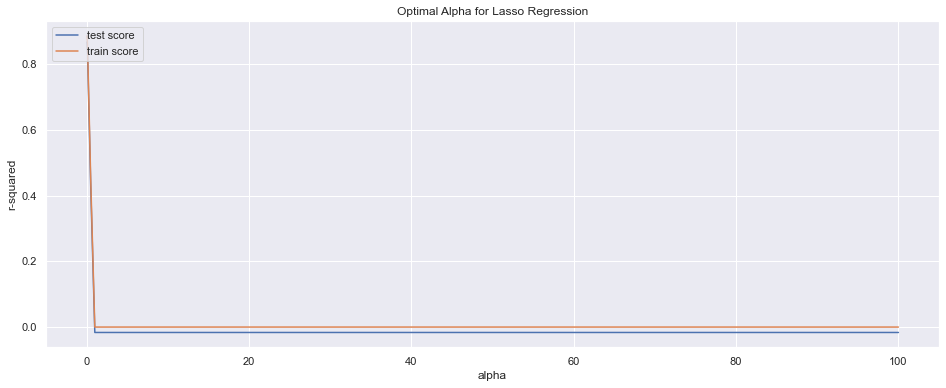

In [52]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('r-squared')
plt.title("Optimal Alpha for Lasso Regression")
plt.legend(['test score', 'train score'], loc='upper left')

In [53]:
model_cv.best_estimator_

Lasso(alpha=0.01)

In [54]:
# using cross validation design
print('RMSE values using best Lasso Regression model: ')
lasso_reg = model_cv.best_estimator_

lasso_reg_scores  = cross_val_score(lasso_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
lasso_rmse_scores = np.sqrt(-lasso_reg_scores)
lasso_rmse_scores

RMSE values using best Lasso Regression model: 


array([0.3694133 , 0.41796002, 0.32766472])

In [55]:
lasso_reg

Lasso(alpha=0.01)

In [56]:
lasso_reg.intercept_

array([0.00188641])

In [57]:
for coef, col in enumerate(X_train.columns):
    print(f'{col}:  {lasso_reg.coef_[coef]}')

LotFrontage:  0.0354748664567405
OverallQual:  0.3145615031690486
YearBuilt:  0.0
YearRemodAdd:  0.11412563503256211
MasVnrArea:  0.0462700241559975
BsmtFinSF1:  0.18170531262791306
TotalBsmtSF:  0.14795576829382434
1stFlrSF:  0.006398499813460171
2ndFlrSF:  0.0
GrLivArea:  0.3409909633144371
TotRmsAbvGrd:  -0.0
GarageYrBlt:  0.006033831367399984
GarageArea:  0.08750510356532422


In [58]:
#Predictions of the SalePrice (Standardized) using Lasso Regression based on housing_test
#Note we do not have SalEPrice to compute accuracy
housing_test_pred = lasso_reg.predict(scaled_test_features_df)
housing_test_pred

array([-0.7270744 , -0.02163337,  0.03129335, ..., -1.23449541,
        0.17838367,  0.81029522])

In [59]:
############################
#  ElasticNet Regression   #
###########################
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)

print('Elastic Net Regression: ')
print('Intercept:', elastic_net_reg.intercept_)
print('Coefficients: ',elastic_net_reg.coef_)

Elastic Net Regression: 
Intercept: [0.00207376]
Coefficients:  [0.00927837 0.30693977 0.00458054 0.08806261 0.03344606 0.14918793
 0.13462352 0.0240127  0.         0.31110891 0.         0.
 0.08892579]


In [60]:
print('coefficient of determination - Elastic Net Regression - Train data:', elastic_net_reg.score(X_train,y_train))
print('coefficient of determination - Elastic Net Regression - Test data:', elastic_net_reg.score(X_test,y_test))

coefficient of determination - Elastic Net Regression - Train data: 0.8731327935003823
coefficient of determination - Elastic Net Regression - Test data: 0.8668804389696761


In [61]:
y_pred_test = elastic_net_reg.predict(X_test)

print ('Elastic_net Regression Prediction Errors: ')
# R2 score
print("R2 score: %.2f", metrics.r2_score(y_test, y_pred_test))

# Mean Squared Error
print("mean_squared_error", metrics.mean_squared_error(y_test, y_pred_test))

# RMSE
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
# Mean Absolute Error
print("mean_absolute_error", metrics.mean_absolute_error(y_test, y_pred_test))

Elastic_net Regression Prediction Errors: 
R2 score: %.2f 0.8668804389696761
mean_squared_error 0.19289935393263094
RMSE 0.43920308962099863
mean_absolute_error 0.2955248580203976


In [62]:
# using cross validation design
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

hyper_params = [{'alpha': [0.01,0.02, 0.024, 0.025, 0.026, 0.03,0.05,0.1,0.5,1.0,10,20,50,100]},
                {'l1_ratio': [0.01,0.02, 0.024, 0.025, 0.026, 0.03,0.05,0.1,0.5,1.0,10,20,50,100]}]
model = ElasticNet() 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train).best_params_

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    0.6s finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.004103  2.715765e-04         0.002256        0.000120        0.01   
1        0.003100  6.045044e-04         0.002052        0.000098        0.02   
2        0.002617  4.589707e-05         0.001953        0.000003       0.024   
3        0.002578  1.770837e-05         0.001953        0.000006       0.025   
4        0.002537  4.740688e-05         0.001919        0.000044       0.026   
5        0.002427  1.561394e-06         0.001871        0.000022        0.03   
6        0.002865  3.065041e-04         0.002087        0.000152        0.05   
7        0.002528  2.404944e-05         0.001895        0.000009         0.1   
8        0.002432  3.122242e-05         0.001892        0.000012         0.5   
9        0.002496  1.270675e-04         0.001943        0.000070           1   
10       0.002579  1.139438e-04         0.002026        0.000074          10   
11       0.002462  1.090197e-04         0.001894        0.000018          20   
12       0.002372  1.015513e-05         0.001890        0.000009          50   
13       0.002516  4.421335e-05         0.001932        0.000021         100   
14       0.002463  8.486124e-06         0.001969        0.000051         NaN   
15       0.002427  8.387305e-06         0.001903        0.000006         NaN   
16       0.002421  5.339488e-06         0.001911        0.000020         NaN   
17       0.002433  1.971568e-05         0.001898        0.000004         NaN   
18       0.002449  3.933320e-05         0.001911        0.000003         NaN   
19       0.002422  2.849964e-06         0.001946        0.000081         NaN   
20       0.002405  7.268035e-05         0.001845        0.000006         NaN   
21       0.002343  2.755314e-06         0.001841        0.000005         NaN   
22       0.002328  9.602742e-07         0.001849        0.000004         NaN   
23       0.002480  1.164462e-04         0.002146        0.000048         NaN   
24       0.003407  1.512079e-04         0.002687        0.000047         NaN   
25       0.003469  7.636841e-06         0.002713        0.000007         NaN   
26       0.003402  6.348514e-05         0.002674        0.000046         NaN   
27       0.003271  5.969465e-06         0.002601        0.000013         NaN   

   param_l1_ratio               params  split0_test_score  split1_test_score  \
0             NaN      {'alpha': 0.01}           0.863258           0.875021   
1             NaN      {'alpha': 0.02}           0.864896           0.873294   
2             NaN     {'alpha': 0.024}           0.865366           0.872549   
3             NaN     {'alpha': 0.025}           0.865461           0.872359   
4             NaN     {'alpha': 0.026}           0.865553           0.872166   
5             NaN      {'alpha': 0.03}           0.865888           0.871380   
6             NaN      {'alpha': 0.05}           0.866924           0.866887   
7             NaN       {'alpha': 0.1}           0.865128           0.852924   
8             NaN       {'alpha': 0.5}           0.721186           0.631138   
9             NaN       {'alpha': 1.0}           0.408969           0.278894   
10            NaN        {'alpha': 10}          -0.032667          -0.015941   
11            NaN        {'alpha': 20}          -0.032667          -0.015941   
12            NaN        {'alpha': 50}          -0.032667          -0.015941   
13            NaN       {'alpha': 100}          -0.032667          -0.015941   
14           0.01   {'l1_ratio': 0.01}           0.843781           0.800093   
15           0.02   {'l1_ratio': 0.02}           0.840726           0.794377   
16          0.024  {'l1_ratio': 0.024}           0.839394           0.792002   
17          0.025  {'l1_ratio': 0.025}           0.839051           0.791401   
18          0.026  {'l1_ratio': 0.026}           0.838705           0.790796   
19           0.03   {'l1_ratio': 0.03}           0.837278           0.788345   
20 

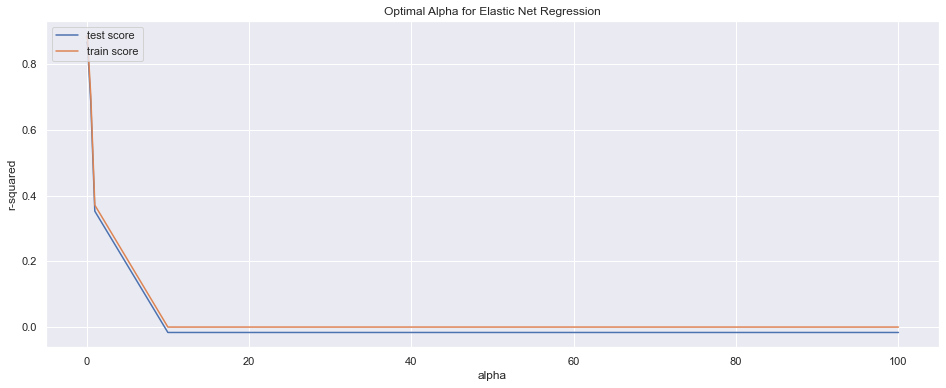

In [63]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('r-squared')
plt.title("Optimal Alpha for Elastic Net Regression")
plt.legend(['test score', 'train score'], loc='upper left')

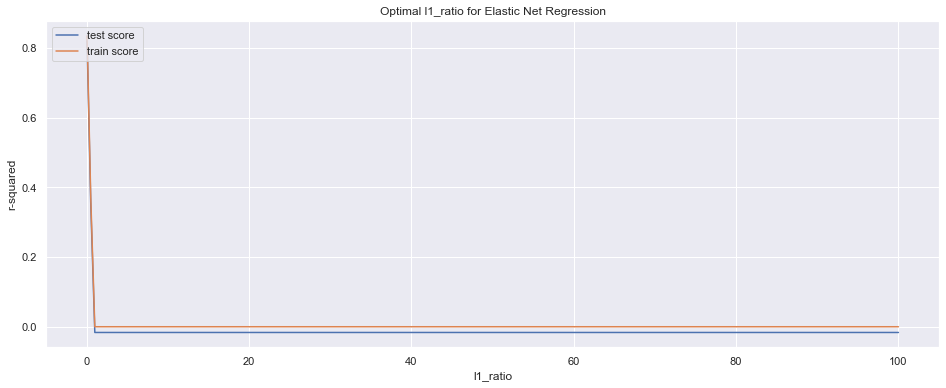

In [64]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_l1_ratio"], cv_results["mean_test_score"])
plt.plot(cv_results["param_l1_ratio"], cv_results["mean_train_score"])
plt.xlabel('l1_ratio')
plt.ylabel('r-squared')
plt.title("Optimal l1_ratio for Elastic Net Regression")
plt.legend(['test score', 'train score'], loc='upper left')

In [65]:
print('RMSE values using best Elastic Net Regression model: ')
#use the best model to compute RMSE using CV design
elastic_net_reg = model_cv.best_estimator_
elastic_net_reg_scores  = cross_val_score(elastic_net_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
elastic_net_rmse_scores = np.sqrt(-elastic_net_reg_scores)
elastic_net_rmse_scores

RMSE values using best Elastic Net Regression model: 


array([0.37145099, 0.41615752, 0.32713784])

In [66]:
model_cv.best_estimator_

ElasticNet(alpha=0.01)

In [67]:
elastic_net_reg.intercept_

array([0.00185269])

In [68]:
for coef, col in enumerate(X_train.columns):
    print(f'{col}:  {elastic_net_reg.coef_[coef]}')

LotFrontage:  0.03936409073190054
OverallQual:  0.3120051412116172
YearBuilt:  0.0
YearRemodAdd:  0.11688960061314344
MasVnrArea:  0.04959290722352811
BsmtFinSF1:  0.1838390849318229
TotalBsmtSF:  0.1472816939541192
1stFlrSF:  0.0091102558665025
2ndFlrSF:  0.0
GrLivArea:  0.34041962295325084
TotRmsAbvGrd:  -0.0
GarageYrBlt:  0.0095915773583166
GarageArea:  0.08673889643498031


In [69]:
#Predictions of the SalePrice (Standardized) using Elastic Net Regression based on housing_test
#Note we do not have SalEPrice to compute accuracy
housing_test_pred = elastic_net_reg.predict(scaled_test_features_df)
housing_test_pred

array([-0.73190803, -0.02147922,  0.03678074, ..., -1.2469669 ,
        0.19732142,  0.81209517])

In [70]:
lin_reg_r2_scores  = cross_val_score(lin_reg, X, y, scoring=('r2'), cv=folds)
lin_reg_r2_scores

array([0.80039488, 0.86040493, 0.89311169])

In [71]:
ridge_reg_r2_scores  = cross_val_score(ridge_reg, X, y, scoring=('r2'), cv=folds)
ridge_reg_r2_scores

array([0.80431961, 0.86377781, 0.89425577])

In [72]:
lasso_reg_r2_scores  = cross_val_score(lasso_reg, X, y, scoring=('r2'), cv=folds)
lasso_reg_r2_scores

array([0.80851079, 0.86313403, 0.89330642])

In [73]:
elastic_net_r2_scores  = cross_val_score(elastic_net_reg, X, y, scoring=('r2'), cv=folds)
elastic_net_r2_scores

array([0.80639245, 0.86431198, 0.89364927])